# Advanced Python for Data Science
### DS-GA 1019

### Homework Assignment 04
### Due date: 03/01/2023, 4:00PM
### Student's Name: Buz Galbraith
### Student's e-mail: wbg231@nyu.edu

# Problem 1 (100 points)

The task is to optimize your solutions by using "line_profiler". 

Your submission "spring2023_sol04_yourid.ipynb" will contain:
- the first part is your original solution (a solution that you originally wrote); 
- the second part is your final, optimized solution after using line_profiler; 
- both of which will include the line_profiler results, and your detailed comments.


The problem is to simulate a random motion of $n$ objects over a discrete time. 

Concretely, there is:
- a unit square $[0,1]^2$, 
- $n$ points within the unit square, 
- and the time is discrete $t=0, 1, 2, \dots$. 

At time $t=0$, the positions of $n$ points are randomly and uniformly distributed within the unit square; call these positions $\{p_0, p_1, p_2,\dots, p_{n-1}\}$. 

At every time step $t \geq 0$, every point $i$, chooses to randomly move in one of four directions: left, right, up, down. The distance is also random uniform number on $[0, \delta]$, where $\delta$ is given. 

That is, at every time step $t$ and for every $i$ we generate a random move as: 
$$ p_i := p_i + r_i \cdot u_i$$
where 
$$ r_i \sim uniform[0, \delta],$$ 
and 
$u_i$ represents a random direction, i.e. a randomly chosen vector among $(-1, 0), (1, 0), (0, -1), (0, 1)$.

**Dynamics**

Now, one would like to examine and plot the diagram of the minimum distance $d_{\min}$ among these $n$ points over $T$ iterations.

The task is to complete the rest of this notebook, where definitions of the functions main_orignal and main_optimized are given below. 

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
%load_ext line_profiler

---
- setup:
    - the function make_points returns a numpy array of (n,2) where the x and y cordiante are generated such that x,y~U(0,1)
    - the fucntion next direction returns a numpy arroy of shape (n,2) which are random samples with replacemnt from the the directions multiples times 1000 random numbers generated from U(0,delta)
    - the function other postion returns (n-1,2) array which is the current postion array execluding one point
    - the function min_dist_to_point finds the minum distance of that point to any other point in the array 
    - the varible min_distiance_among_all_points holds the minimum distance among all the min_dist_to_point calls
- algorithim: 
    - initilze the points using the make_points function 
    - create an array to hold the min_distiance_among_all_points variable at each itteration
    - for each itterations:
        - move each point to a new postion by adding the ressult of  next_direction to the current position array
        - find the minum distance between two points using min_distiance_among_all_points
        - append the min_distiance_among_all_points to out output array 
    - return the output array

---


In [11]:
from math import dist
def main_original(n, delta, T): 
    """ 
    n: is the number of uniformly at random generated points in the unit square 
    delta: a maximal move of a point in one of four random directions: left, right, up, or down 
    T: number of iterations
    return: 
    lst_of_min_distances: of the minimum distances among all n points over times: t=0, 1, 2, \dots, T - 1,
    it is a list of reals of length T"""
    rng=np.random.default_rng(15100873)
    make_points=lambda n:  rng.uniform(0,1,(n,2))  ## make new points
    dist_1=lambda p,q:dist(p,q)
    next_direction=lambda n,delta:np.multiply( rng.choice([(0,-1), (0,1), (1,0), (-1,0)], n) , rng.uniform(0,delta,n)[:, np.newaxis]) ## determine direction of each point in next step
    other_positions=lambda current_postions, postion_to_exclude :current_postions[(current_postions!=postion_to_exclude).any(axis=1)] ## returns a numpy array of all other points 
    min_dist_to_point=lambda point :min(np.apply_along_axis(func1d= dist_1,axis=1, arr=other_positions(current_postions,point) , q= point)) ## miumum distance from 1 point to any other. 
    
    current_postions=make_points(n)
    #min_distiance_among_all_points= min(np.apply_along_axis(func1d= min_dist_to_point,axis=1, arr=current_postions ))## min distance to all points 
    min_distance_itterations=[] ## initilize with starting min_distance


    for i in range(T):
        current_postions+=next_direction(n,delta)
        min_distiance_among_all_points=  min(np.apply_along_axis(func1d= min_dist_to_point,axis=1, arr=current_postions ))
        min_distance_itterations.append(min_distiance_among_all_points)


    return min_distance_itterations

In [4]:
n = 1500
delta = 1.0 / n
T = 20


In [5]:
%lprun -f main_original lst_min_dist = main_original(n, delta, T) ## torignal is 1 min 44 seconds. 

Timer unit: 1e-09 s

Total time: 144.674 s
File: /tmp/ipykernel_3450/2336597031.py
Function: main_original at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def main_original(n, delta, T): 
     3                                               """ 
     4                                               n: is the number of uniformly at random generated points in the unit square 
     5                                               delta: a maximal move of a point in one of four random directions: left, right, up, or down 
     6                                               T: number of iterations
     7                                               return: 
     8                                               lst_of_min_distances: of the minimum distances among all n points over times: t=0, 1, 2, \dots, T - 1,
     9                                               it is a list of reals of length T"""
    10         1  

len: 20


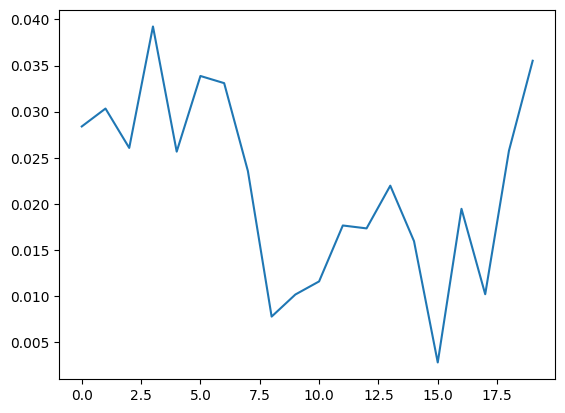

In [6]:
# plot the diagram of the minimum distances:
# where we rescale distance with by factor $\sqrt{n}$:
print("len:", len(lst_min_dist))
plt.plot(range(T), np.array(lst_min_dist) * np.sqrt(n))
plt.show()

---

### The optimized code description: 
the overall logic is farily similar. I just changed a few important points. 
algorithim:
- initlize an random number generaetor for reproducibility
- initilize a point array, and make a copy of it called points prev
- initlize a min_distance array repreting the minum distance at that itteration
- for each itteration:
    - move each point acording to the rule
    - for the distance of every point in there new poistions to every point in there old postions
    - set the minum of the previous step at the ith poistion in our min distance array
    - coppy the current poistions of points  points_prev
---
- this algorithm is faster becusae i reduced overall function calls by cutting out lambda functions and also stopped applying functions over matricies manually,  and instead used slicing for pretty much everyhting. 
- i also declared the length of each data strucutre when they were created which helps make thing more efficent 
- I also used only updated two arrays points and points_prev  instead of making new ones every time, which was a lot more efficent. 



In [7]:
from numpy import sqrt
from numpy import add 
from numpy import multiply
from numpy.random import default_rng
from numpy import zeros
from numpy import min as np_min

def calc_change(g1,g2):
    out=[0]*len(g1) ## output array of firxed length
    for i in range(len(g1)): ## for all pointts in points
        c=g1-g2[i,:] ## subtracts point from given array
        out[i]=sqrt(np.add(c[:,0]**2,c[:,1]**2)) ## calcualte equilidina distance
    return np_min(out) ## return the min of the array 


def main_optimized(n, delta, T): 
    """ 
    n: is the number of uniformly at random generated points in the unit square 
    delta: a maximal move of a point in one of four random directions: left, right, up, or down 
    T: number of iterations
    return: 
    lst_of_min_distances: of the minimum distances among all n points over times: t=0, 1, 2, \dots, T - 1,
    it is a list of reals of length T"""
    rng=default_rng(15100873) ## initilize rng 
    points=rng.uniform(0,1,(n,2)) ## points initlized
    points_prev=zeros((n,2)) ## previous points initilized
    min_distances=zeros(T) ## output array initilized as proper size
    points_prev[:] = points[:] ## coppy points into points prev 
    for i in range(T): 
        points+=(multiply( rng.choice([(0,-1), (0,1), (1,0), (-1,0)], n) , rng.uniform(0,delta,n)[:, np.newaxis])) ## update points to there next location
        min_distances[i]=calc_change(points,points_prev) ## run the cacl change function which finds the min distance between any two points in the array. 
        points_prev[:] = points[:]## coppy points into points prev
    return(min_distances) ## reutrns the min distance array 

In [8]:
n = 1500
delta = 1.0 / n
T = 40

In [13]:
%lprun -f main_optimized lst_min_dist = main_optimized(n, delta, T)

Timer unit: 1e-09 s

Total time: 1.20457 s
File: /tmp/ipykernel_3450/1719857606.py
Function: main_optimized at line 16

Line #      Hits         Time  Per Hit   % Time  Line Contents
    16                                           def main_optimized(n, delta, T): 
    17                                               """ 
    18                                               n: is the number of uniformly at random generated points in the unit square 
    19                                               delta: a maximal move of a point in one of four random directions: left, right, up, or down 
    20                                               T: number of iterations
    21                                               return: 
    22                                               lst_of_min_distances: of the minimum distances among all n points over times: t=0, 1, 2, \dots, T - 1,
    23                                               it is a list of reals of length T"""
    24         

len: 40


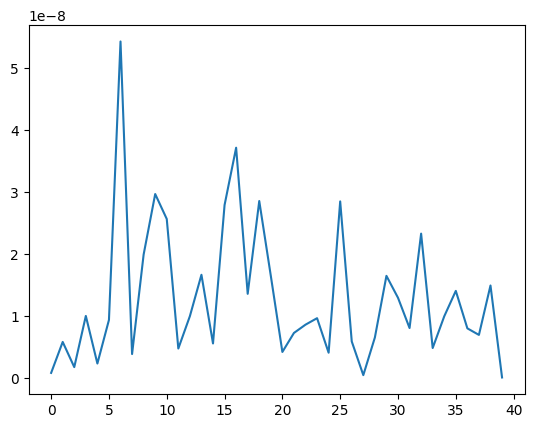

In [14]:
# plot the diagram of the minimum distances:
# where we rescale distance by a factor $\sqrt{n}$:
print("len:", len(lst_min_dist))
plt.plot(range(T), np.array(lst_min_dist) / np.sqrt(n))
plt.show()
